<a href="https://colab.research.google.com/github/ranjannalini10/energy_appliance_prediction/blob/main/EDA_2%5BAppliances_Energy_Prediction%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries
#Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import folium as fo
import plotly.graph_objects as go
from datetime import datetime
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path ='/content/drive/MyDrive/data_application_energy.csv'
df=pd.read_csv(file_path,encoding_errors='ignore')

Mounted at /content/drive


In [ ]:
Odf=df.copy()

In [ ]:
#dataset first View
df.head(10)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.20,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.20,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.20,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.20,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.20,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.20,44.500000,19.79,44.933333,18.890000,45.730000,17.133333,55.030000,6.300000,85.766667,17.133333,41.260000,18.1,48.590000,17.000000,45.29,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.20,44.500000,19.79,44.900000,18.890000,45.790000,17.100000,54.966667,6.263333,86.090000,17.133333,41.200000,18.1,48.590000,17.000000,45.29,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.20,44.500000,19.73,44.900000,18.890000,45.863333,17.100000,54.900000,6.190000,86.423333,17.100000,41.200000,18.1,48.590000,17.000000,45.29,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.20,44.433333,19.73,44.790000,18.890000,45.790000,17.166667,55.000000,6.123333,87.226667,17.166667,41.400000,18.1,48.590000,17.000000,45.29,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.23,44.400000,19.79,44.863333,18.890000,46.096667,17.100000,55.000000,6.190000,87.626667,17.200000,41.500000,18.1,48.590000,17.000000,45.29,5.950000,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314


In [ ]:
# Dataset Rows & Columns count
df.shape


(19735, 29)

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [ ]:
# Dataset Duplicate Value Count
print(df.duplicated().sum())

0


In [ ]:
# Missing Values/Null Values Count
nan_count = df.isna().sum(axis = 0)
nan_count.head(10)

date          0
Appliances    0
lights        0
T1            0
RH_1          0
T2            0
RH_2          0
T3            0
RH_3          0
T4            0
dtype: int64

In [ ]:
# Dataset Columns
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [ ]:
#Variable Description
#date: date  format yyyy-mm-dd
#time: time  format hh:mm:ss
#appliance1 - appliance8: energy consumption of different appliances the building, measured watt-hours (Wh)
#kitchen_temperature: temperature, the kitchen area (Celsius)
#kitchen_humidity: humidity, the kitchen area (%)
#living_room_temperature: temperature, the living room area (Celsius)
#living_room_humidity: humidity, the living room area (%)
#laundry_room_temperature: temperature, the laundry room area (Celsius)
#laundry_room_humidity: humidity, the laundry room area (%)
#office_temperature: temperature, the office room (Celsius)
#office_humidity: humidity, the office room (%)
#bathroom_temperature: temperature, the bathroom (Celsius)
#bathroom_humidity: humidity, the bathroom (%)
#outside_temperature: temperature, outside the building (Celsius)
#outside_pressure: pressure, outside the building (mm Hg)
#outside_humidity: humidity, outside the building (%)
#wind_speed: wind speed (m/s)
#wind_direction: wind direction (degrees)
#visibility: visibility (km)
#dew_point_temperature: dew point temperature (Celsius)
#rv1: a random variable, non-dimensional
#rv2: another random variable, non-dimensional

In [ ]:
column_list = df.columns.values.tolist()
no_unique=[]
for column_name in column_list:
  no_unique.append(df[column_name].nunique())
unique = pd.DataFrame(list(zip(column_list, no_unique)),
               columns =['variable', 'no. of uniques values'])
unique.head(10)

,variable,no. of uniques values
0,date,19735
1,Appliances,92
2,lights,8
3,T1,722
4,RH_1,2547
5,T2,1650
6,RH_2,3376
7,T3,1426
8,RH_3,2618
9,T4,1390


In [ ]:
df['date'] =  pd.to_datetime(df['date'],errors='ignore')
df['date1'] =(df['date']).dt.date
df['time'] =(df['date']).dt.time
df.head(10)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,date1,time
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.20,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,2016-01-11,17:00:00
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.20,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,2016-01-11,17:10:00
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.20,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,2016-01-11,17:20:00
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.20,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,2016-01-11,17:30:00
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.20,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,2016-01-11,17:40:00
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.20,44.500000,19.79,44.933333,18.890000,45.730000,17.133333,55.030000,6.300000,85.766667,17.133333,41.260000,18.1,48.590000,17.000000,45.29,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484,2016-01-11,17:50:00
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.20,44.500000,19.79,44.900000,18.890000,45.790000,17.100000,54.966667,6.263333,86.090000,17.133333,41.200000,18.1,48.590000,17.000000,45.29,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763,2016-01-11,18:00:00
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.20,44.500000,19.73,44.900000,18.890000,45.863333,17.100000,54.900000,6.190000,86.423333,17.100000,41.200000,18.1,48.590000,17.000000,45.29,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890,2016-01-11,18:10:00
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.20,44.433333,19.73,44.790000,18.890000,45.790000,17.166667,55.000000,6.123333,87.226667,17.166667,41.400000,18.1,48.590000,17.000000,45.29,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702,2016-01-11,18:20:00
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.23,44.400000,19.79,44.863333,18.890000,46.096667,17.100000,55.000000,6.190000,87.626667,17.200000,41.500000,18.1,48.590000,17.000000,45.29,5.950000,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314,2016-01-11,18:30:00


In [ ]:
df['date1'] =  pd.to_datetime(df['date1'])
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')



In [ ]:
df.dtypes

date           datetime64[ns]
Appliances              int64
lights                  int64
T1                    float64
RH_1                  float64
T2                    float64
RH_2                  float64
T3                    float64
RH_3                  float64
T4                    float64
RH_4                  float64
T5                    float64
RH_5                  float64
T6                    float64
RH_6                  float64
T7                    float64
RH_7                  float64
T8                    float64
RH_8                  float64
T9                    float64
RH_9                  float64
T_out                 float64
Press_mm_hg           float64
RH_out                float64
Windspeed             float64
Visibility            float64
Tdewpoint             float64
rv1                   float64
rv2                   float64
date1          datetime64[ns]
time           datetime64[ns]
dtype: object

In [ ]:
# Rename the variables

new_names = {
    'T1': 'Temperature_kitchen',
    'RH_1': 'Humidity_kitchen',
    'T2': 'Temperature_living_room',
    'RH_2': 'Humidity_living_room',
    'T3': 'Temperature_laundry_room',
    'RH_3': 'Humidity_laundry_room',
    'T4': 'Temperature_office_room',
    'RH_4': 'Humidity_office_room',
    'T5': 'Temperature_bathroom',
    'RH_5': 'Humidity_bathroom',
    'T6': 'Temperature_outside_north',
    'RH_6': 'Humidity_outside_north',
    'T7': 'Temperature_ironing_room',
    'RH_7': 'Humidity_ironing_room',
    'T8': 'Temperature_teenager_room',
    'RH_8': 'Humidity_teenager_room',
    'T9': 'Temperature_parents_room',
    'RH_9': 'Humidity_parents_room',
    'T_out': 'Temperature_outside',
    'Press_mm_hg': 'Pressure',
    'RH_out': 'Humidity_outside',
    'Windspeed': 'Wind_speed',
    'Visibility': 'Visibility_in_km',
    'Tdewpoint': 'Dew_point_temperature',
    'rv1': 'Random_variable_1',
    'rv2': 'Random_variable_2'
}

df.rename(columns=new_names, inplace=True)

df.head(10)

,date,Appliances,lights,Temperature_kitchen,Humidity_kitchen,Temperature_living_room,Humidity_living_room,Temperature_laundry_room,Humidity_laundry_room,Temperature_office_room,Humidity_office_room,Temperature_bathroom,Humidity_bathroom,Temperature_outside_north,Humidity_outside_north,Temperature_ironing_room,Humidity_ironing_room,Temperature_teenager_room,Humidity_teenager_room,Temperature_parents_room,Humidity_parents_room,Temperature_outside,Pressure,Humidity_outside,Wind_speed,Visibility_in_km,Dew_point_temperature,Random_variable_1,Random_variable_2,date1,time
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.20,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,2016-01-11,1900-01-01 17:00:00
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.20,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,2016-01-11,1900-01-01 17:10:00
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.20,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,2016-01-11,1900-01-01 17:20:00
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.20,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,2016-01-11,1900-01-01 17:30:00
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.20,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,2016-01-11,1900-01-01 17:40:00
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.20,44.500000,19.79,44.933333,18.890000,45.730000,17.133333,55.030000,6.300000,85.766667,17.133333,41.260000,18.1,48.590000,17.000000,45.29,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484,2016-01-11,1900-01-01 17:50:00
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.20,44.500000,19.79,44.900000,18.890000,45.790000,17.100000,54.966667,6.263333,86.090000,17.133333,41.200000,18.1,48.590000,17.000000,45.29,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763,2016-01-11,1900-01-01 18:00:00
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.20,44.500000,19.73,44.900000,18.890000,45.863333,17.100000,54.900000,6.190000,86.423333,17.100000,41.200000,18.1,48.590000,17.000000,45.29,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890,2016-01-11,1900-01-01 18:10:00
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.20,44.433333,19.73,44.790000,18.890000,45.790000,17.166667,55.000000,6.123333,87.226667,17.166667,41.400000,18.1,48.590000,17.000000,45.29,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702,2016-01-11,1900-01-01 18:20:00
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.23,44.400000,19.79,44.863333,18.890000,46.096667,17.100000,55.000000,6.190000,87.626667,17.200000,41.500000,18.1,48.590000,17.000000,45.29,5.950000,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314,2016-01-11,1900-01-01 18:30:00


In [ ]:
# Chart 1 comparison between energy and temperature 


temp_cols = ['Temperature_kitchen', 'Temperature_living_room', 'Temperature_laundry_room']
energy_cols = ['Appliances', 'lights']
df_temp = df[temp_cols].mean(axis=1)
df_energy = df[energy_cols].sum(axis=1)
df_energy.head(10)

0     90
1     90
2     80
3     90
4    100
5     90
6    110
7    110
8    100
9    110
dtype: int64

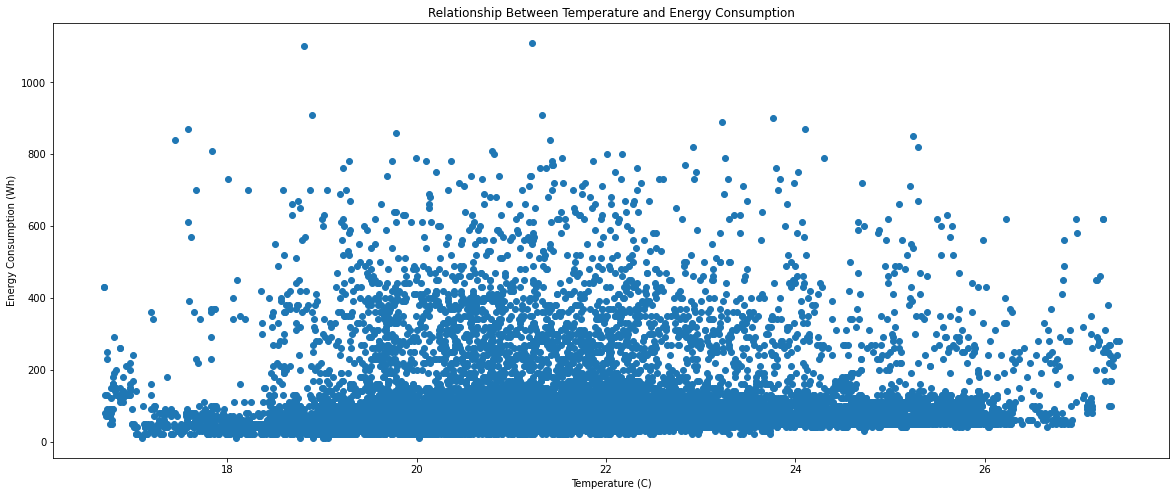

In [ ]:
#Graph
plt.figure(figsize=(20,8))
plt.scatter(df_temp, df_energy)
plt.xlabel('Temperature (C)')
plt.ylabel('Energy Consumption (Wh)')
plt.title('Relationship Between Temperature and Energy Consumption')
plt.show()

In [ ]:
# Chart 2 Appliances that consumes more energy


appliances = df[['Appliances', 'lights', 'Temperature_kitchen', 'Humidity_kitchen', 'Temperature_living_room', 'Humidity_living_room', 'Temperature_laundry_room', 'Humidity_laundry_room', 'Temperature_office_room', 'Humidity_office_room', 'Temperature_bathroom', 'Humidity_bathroom', 'Temperature_outside_north', 'Humidity_outside_north', 'Temperature_ironing_room', 'Humidity_ironing_room', 'Temperature_teenager_room', 'Humidity_teenager_room', 'Temperature_parents_room', 'Humidity_parents_room']]
average_consumption = appliances.mean()
sorted_appliances = average_consumption.sort_values(ascending=False)
print(sorted_appliances)


Appliances                   97.694958
Humidity_outside_north       54.609083
Humidity_bathroom            50.949283
Humidity_teenager_room       42.936165
Humidity_parents_room        41.552401
Humidity_living_room         40.420420
Humidity_kitchen             40.259739
Humidity_laundry_room        39.242500
Humidity_office_room         39.026904
Humidity_ironing_room        35.388200
Temperature_laundry_room     22.267611
Temperature_teenager_room    22.029107
Temperature_kitchen          21.686571
Temperature_office_room      20.855335
Temperature_living_room      20.341219
Temperature_ironing_room     20.267106
Temperature_bathroom         19.592106
Temperature_parents_room     19.485828
Temperature_outside_north     7.910939
lights                        3.801875
dtype: float64


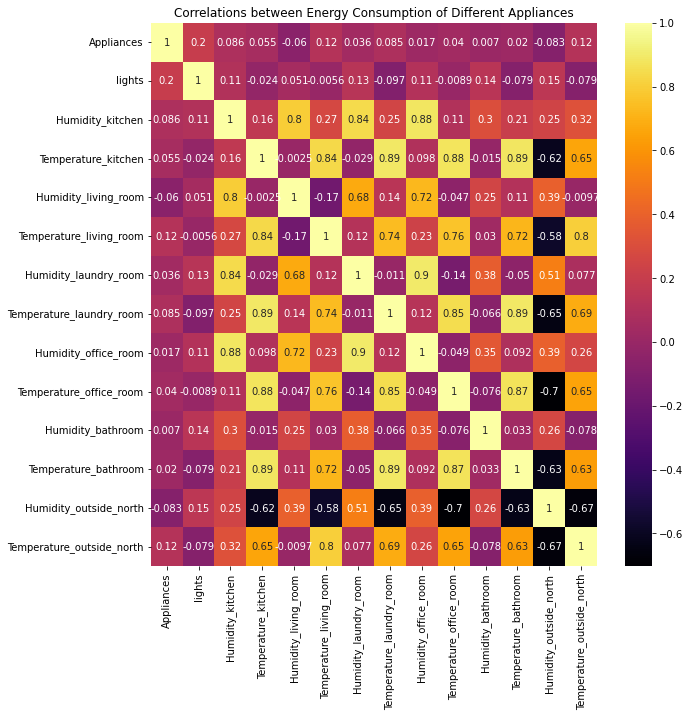

In [ ]:
# Chart 3 Corelation matrix between energy consumption of different appliances
appliance_cols = ['Appliances', 'lights', 'Humidity_kitchen', 'Temperature_kitchen',
                   'Humidity_living_room', 'Temperature_living_room', 'Humidity_laundry_room',
                   'Temperature_laundry_room', 'Humidity_office_room', 'Temperature_office_room',
                   'Humidity_bathroom', 'Temperature_bathroom', 'Humidity_outside_north', 'Temperature_outside_north']
corr_matrix = df[appliance_cols].corr()

# Graph
plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, cmap='inferno', annot=True)
plt.title('Correlations between Energy Consumption of Different Appliances')
plt.show()

In [ ]:
df_new = Odf.copy()


df_new['Mean_indoor_temperature'] = df_new[['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9']].mean(axis=1)


df_new['Mean_outdoor_temperature'] = df_new['T_out']

df_new['Mean_indoor_humidity'] = df_new[['RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9']].mean(axis=1)


df_new['Mean_outdoor_humidity'] = df_new['RH_out']
df_new['Total_consumption'] = df_new[['Appliances', 'lights']].sum(axis=1)
df_new.head()


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Mean_indoor_temperature,Mean_outdoor_temperature,Mean_indoor_humidity,Mean_outdoor_humidity,Total_consumption
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,17.167407,6.600000,50.910741,92.0,90
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,17.149630,6.483333,50.827222,92.0,90
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,17.103704,6.366667,50.628889,92.0,80
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,17.067037,6.250000,50.574815,92.0,90
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,17.070741,6.133333,50.732963,92.0,100


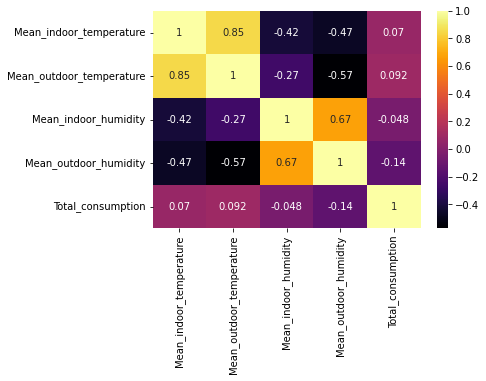

In [ ]:
col_list4corr = df_new[['Mean_indoor_temperature','Mean_outdoor_temperature','Mean_indoor_humidity','Mean_outdoor_humidity','Total_consumption']]
corr_matrix = col_list4corr.corr()

sns.heatmap(corr_matrix, cmap='inferno', annot=True)

plt.show()

In [ ]:
#Energy consumption per day per hour and per week
df['hour'] = df['date'].dt.hour
df['dayofweek'] = df['date'].dt.dayofweek

avg_energy = pd.pivot_table(df, values='Appliances', index='hour', columns='dayofweek', aggfunc='mean')

fig = go.Figure()
for i in range(7):
    fig.add_trace(go.Scatter(x=avg_energy.index, y=avg_energy[i], name=str(i)))
avg_energy



dayofweek,0,1,2,3,4,5,6
hour,,,,,,,
0,53.684211,66.083333,52.083333,49.250000,49.000000,49.122807,50.000000
1,52.719298,56.250000,52.583333,49.416667,48.916667,48.245614,51.052632
2,50.964912,49.083333,49.500000,48.416667,49.333333,47.543860,48.684211
3,50.175439,47.083333,48.416667,46.750000,48.166667,47.719298,49.473684
4,50.438596,48.833333,52.000000,47.333333,48.916667,47.982456,50.000000
5,54.824561,59.833333,55.083333,53.083333,49.333333,46.403509,50.263158
6,56.228070,53.000000,73.666667,50.333333,72.833333,48.771930,48.157895
7,71.403509,82.333333,72.166667,78.750000,104.250000,68.157895,72.280702
8,94.035088,87.416667,112.000000,91.333333,128.000000,99.122807,131.403509


In [ ]:
#graph
fig.update_layout(title='Hourly Energy Consumption by Day of Week',
                  xaxis_title='Hour of Day',
                  yaxis_title='Energy Consumption (Wh)')

fig.show()

In [ ]:
#Total energy consumption of building for each date
total_energy = df.groupby('date1').agg({'Appliances':'mean', 'lights':'mean'})
total_energy['total_consumption'] = total_energy[['Appliances', 'lights']].sum(axis=1)
total_energy.head(10)

,Appliances,lights,total_consumption
date1,,,
2016-01-11,136.666667,30.000000,166.666667
2016-01-12,85.694444,4.236111,89.930556
2016-01-13,97.013889,5.416667,102.430556
2016-01-14,151.388889,5.000000,156.388889
2016-01-15,125.347222,5.972222,131.319444
2016-01-16,125.277778,7.986111,133.263889
2016-01-17,142.708333,4.930556,147.638889
2016-01-18,93.958333,3.402778,97.361111
2016-01-19,83.263889,2.708333,85.972222


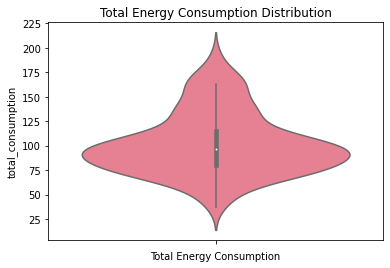

In [ ]:
sns.violinplot(y="total_consumption", data=total_energy, palette="husl", box=True)
plt.title("Total Energy Consumption Distribution")
plt.xlabel("Total Energy Consumption")
plt.show()

In [ ]:
fig = px.violin(total_energy, x='total_consumption')
fig.update_layout(title="Total Energy Consumption Distribution", xaxis_title="Total Energy Consumption")
fig.show()


In [ ]:
df_new['date']=pd.to_datetime(df["date"],format='%Y-%m-%d %H:%M:%S')
df_new.dtypes

date                        datetime64[ns]
Appliances                           int64
lights                               int64
T1                                 float64
RH_1                               float64
T2                                 float64
RH_2                               float64
T3                                 float64
RH_3                               float64
T4                                 float64
RH_4                               float64
T5                                 float64
RH_5                               float64
T6                                 float64
RH_6                               float64
T7                                 float64
RH_7                               float64
T8                                 float64
RH_8                               float64
T9                                 float64
RH_9                               float64
T_out                              float64
Press_mm_hg                        float64
RH_out     

In [ ]:
df_new['day_name'] = df['date'].dt.day_name()
df_new['month'] = df_new['date'].dt.month
df_new['week'] = df_new['date'].dt.week

<ipython-input-30-d16305371601>:3: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.



In [ ]:
df_new.head(10)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Mean_indoor_temperature,Mean_outdoor_temperature,Mean_indoor_humidity,Mean_outdoor_humidity,Total_consumption,day_name,month,week
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.20,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,17.167407,6.600000,50.910741,92.000000,90,Monday,1,2
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.20,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,17.149630,6.483333,50.827222,92.000000,90,Monday,1,2
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.20,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,17.103704,6.366667,50.628889,92.000000,80,Monday,1,2
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.20,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,17.067037,6.250000,50.574815,92.000000,90,Monday,1,2
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.20,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,17.070741,6.133333,50.732963,92.000000,100,Monday,1,2
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.20,44.500000,19.79,44.933333,18.890000,45.730000,17.133333,55.030000,6.300000,85.766667,17.133333,41.260000,18.1,48.590000,17.000000,45.29,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484,17.048519,6.016667,50.791852,92.000000,90,Monday,1,2
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.20,44.500000,19.79,44.900000,18.890000,45.790000,17.100000,54.966667,6.263333,86.090000,17.133333,41.200000,18.1,48.590000,17.000000,45.29,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763,17.040741,5.900000,50.788148,92.000000,110,Monday,1,2
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.20,44.500000,19.73,44.900000,18.890000,45.863333,17.100000,54.900000,6.190000,86.423333,17.100000,41.200000,18.1,48.590000,17.000000,45.29,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890,17.018519,5.916667,50.802963,91.833333,110,Monday,1,2
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.20,44.433333,19.73,44.790000,18.890000,45.790000,17.166667,55.000000,6.123333,87.226667,17.166667,41.400000,18.1,48.590000,17.000000,45.29,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702,17.018519,5.933333,50.901944,91.666667,100,Monday,1,2
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.23,44.400000,19.79,44.863333,18.890000,46.096667,17.100000,55.000000,6.190000,87.626667,17.200000,41.500000,18.1,48.590000,17.000000,45.29,5.950000,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314,17.039630,5.950000,51.050741,91.500000,110,Monday,1,2


In [ ]:
df_new['weekday'] = df['date'].dt.weekday
df_new['weekday/weekend']=''
for i in range(len(df_new)):
    if df_new['weekday'][i] >= 5:
        df_new['weekday/weekend'][i] = "weekend"
    else:
        df_new['weekday/weekend'][i] = "weekday"

df_new.head(10)

<ipython-input-32-f8fc9856a590>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-32-f8fc9856a590>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Mean_indoor_temperature,Mean_outdoor_temperature,Mean_indoor_humidity,Mean_outdoor_humidity,Total_consumption,day_name,month,week,weekday,weekday/weekend
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.20,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,17.167407,6.600000,50.910741,92.000000,90,Monday,1,2,0,weekday
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.20,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,17.149630,6.483333,50.827222,92.000000,90,Monday,1,2,0,weekday
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.20,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,17.103704,6.366667,50.628889,92.000000,80,Monday,1,2,0,weekday
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.20,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,17.067037,6.250000,50.574815,92.000000,90,Monday,1,2,0,weekday
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.20,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,17.070741,6.133333,50.732963,92.000000,100,Monday,1,2,0,weekday
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.20,44.500000,19.79,44.933333,18.890000,45.730000,17.133333,55.030000,6.300000,85.766667,17.133333,41.260000,18.1,48.590000,17.000000,45.29,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484,17.048519,6.016667,50.791852,92.000000,90,Monday,1,2,0,weekday
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.20,44.500000,19.79,44.900000,18.890000,45.790000,17.100000,54.966667,6.263333,86.090000,17.133333,41.200000,18.1,48.590000,17.000000,45.29,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763,17.040741,5.900000,50.788148,92.000000,110,Monday,1,2,0,weekday
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.20,44.500000,19.73,44.900000,18.890000,45.863333,17.100000,54.900000,6.190000,86.423333,17.100000,41.200000,18.1,48.590000,17.000000,45.29,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890,17.018519,5.916667,50.802963,91.833333,110,Monday,1,2,0,weekday
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.20,44.433333,19.73,44.790000,18.890000,45.790000,17.166667,55.000000,6.123333,87.226667,17.166667,41.400000,18.1,48.590000,17.000000,45.29,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702,17.018519,5.933333,50.901944,91.666667,100,Monday,1,2,0,weekday
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.23,44.400000,19.79,44.863333,18.890000,46.096667,17.100000,55.000000,6.190000,87.626667,17.200000,41.500000,18.1,48.590000,17.000000,45.29,5.950000,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314,17.039630,5.950000,51.050741,91.500000,110,Monday,1,2,0,weekday


In [ ]:
print(df_new['weekday'][3])

0


In [ ]:
energy_wd_wknd = df_new.groupby('weekday')['Appliances', 'lights'].mean()
energy_wd_wknd

<ipython-input-34-fb12c7207fc5>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Appliances,lights
weekday,,
0,111.450684,5.892729
1,87.125000,4.013889
2,89.930556,4.180556
3,90.434028,4.083333
4,104.622144,2.144112
5,106.246345,2.258772
6,94.915936,4.027778


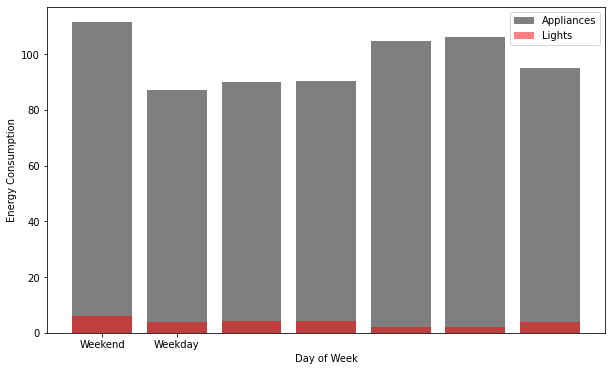

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(energy_wd_wknd.index, energy_wd_wknd['Appliances'], color='black', alpha= 0.5, label='Appliances')
plt.bar(energy_wd_wknd.index, energy_wd_wknd['lights'], color='red', alpha= 0.5, label='Lights')
plt.xticks([0, 1], ['Weekend', 'Weekday'])
plt.xlabel('Day of Week')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()

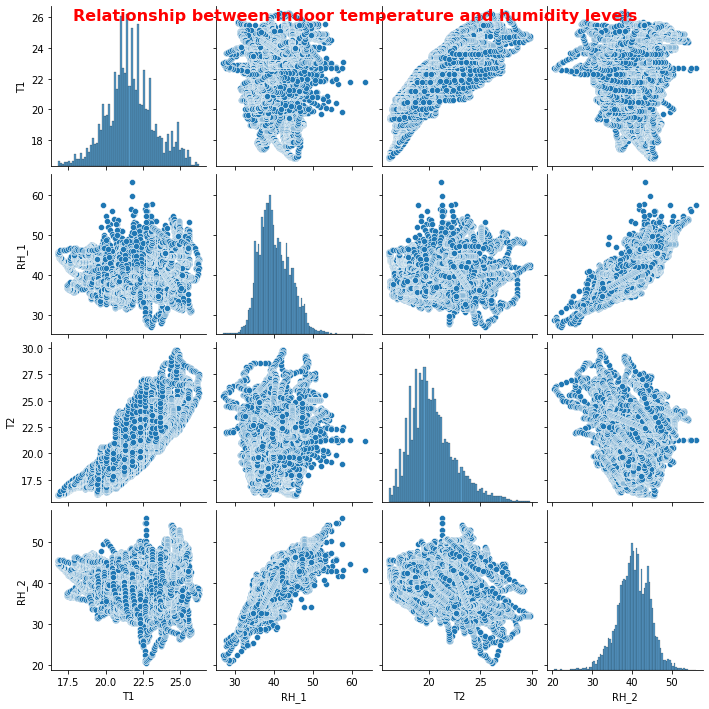

In [ ]:
columns_taken = ['T1', 'RH_1', 'T2', 'RH_2']
sns.pairplot(df_new[columns_taken])
plt.suptitle('Relationship between indoor temperature and humidity levels', fontsize=16, fontweight ='bold', color = 'Red')
plt.show()


In [ ]:
#Energy consumption per week in a month
energy_per_week = df_new.groupby("week").agg({'Appliances': 'mean', 'lights': 'mean'}) 
energy_per_week


,Appliances,lights
week,,
2,121.953642,6.721854
3,96.190476,4.503968
4,75.456349,3.144841
5,98.888889,8.253968
6,113.164683,6.130952
7,95.704365,6.001984
8,87.996032,5.138889
9,97.251984,4.593254
10,90.674603,4.295635


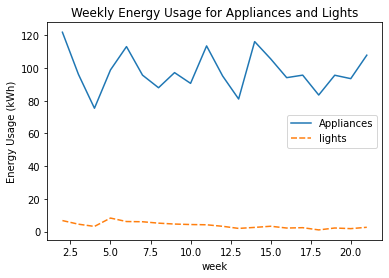

In [ ]:
sns.lineplot(data=energy_per_week)
plt.title('Weekly Energy Usage for Appliances and Lights')
plt.xlabel('week')
plt.ylabel('Energy Usage (kWh)')
plt.show()

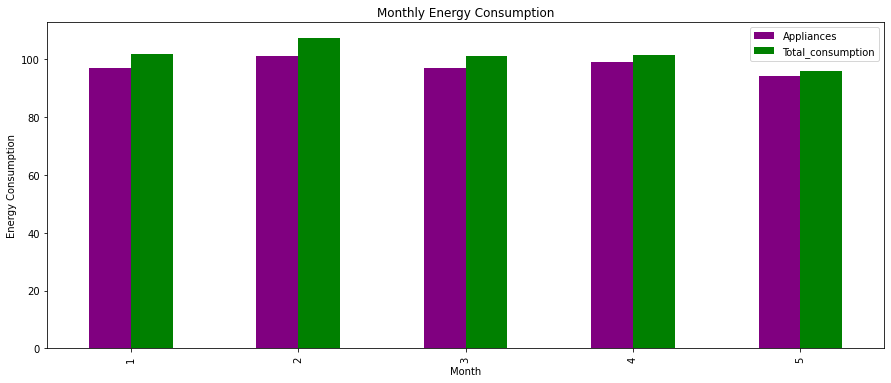

In [ ]:
#Energy consumption distribution for all 4 months
monthly_consumption = df_new.groupby('month').agg({'Appliances': 'mean', 'Total_consumption': 'mean'})
monthly_consumption

monthly_consumption.plot.bar(figsize=(15,6),color=['purple', 'green',])
plt.title('Monthly Energy Consumption')
plt.xlabel('Month')
plt.ylabel('Energy Consumption')
plt.show()

In [ ]:
#Change in energy consumption wrt temperature for all 4 months

In [ ]:
#Week-weekend (groupyby week) for all 4 months

In [ ]:
Monthly_consumption = df_new.groupby([df_new['date'].dt.month, df_new['date'].dt.day]).agg({'Appliances': 'mean', 'Total_consumption': 'mean'})

Monthly_consumption.index = Monthly_consumption.index.set_names(['month', 'day'])
Monthly_consumption = Monthly_consumption.reset_index()
Monthly_consumption

,month,day,Appliances,Total_consumption
0,1,11,136.666667,166.666667
1,1,12,85.694444,89.930556
2,1,13,97.013889,102.430556
3,1,14,151.388889,156.388889
4,1,15,125.347222,131.319444
5,1,16,125.277778,133.263889
6,1,17,142.708333,147.638889
7,1,18,93.958333,97.361111
8,1,19,83.263889,85.972222
9,1,20,114.444444,120.277778


In [ ]:
df_new.head(5)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Mean_indoor_temperature,Mean_outdoor_temperature,Mean_indoor_humidity,Mean_outdoor_humidity,Total_consumption,day_name,month,week,weekday,weekday/weekend
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,17.167407,6.600000,50.910741,92.0,90,Monday,1,2,0,weekday
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,17.149630,6.483333,50.827222,92.0,90,Monday,1,2,0,weekday
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,17.103704,6.366667,50.628889,92.0,80,Monday,1,2,0,weekday
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,17.067037,6.250000,50.574815,92.0,90,Monday,1,2,0,weekday
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,17.070741,6.133333,50.732963,92.0,100,Monday,1,2,0,weekday


In [ ]:
df.head(10)

,date,Appliances,lights,Temperature_kitchen,Humidity_kitchen,Temperature_living_room,Humidity_living_room,Temperature_laundry_room,Humidity_laundry_room,Temperature_office_room,Humidity_office_room,Temperature_bathroom,Humidity_bathroom,Temperature_outside_north,Humidity_outside_north,Temperature_ironing_room,Humidity_ironing_room,Temperature_teenager_room,Humidity_teenager_room,Temperature_parents_room,Humidity_parents_room,Temperature_outside,Pressure,Humidity_outside,Wind_speed,Visibility_in_km,Dew_point_temperature,Random_variable_1,Random_variable_2,date1,time,hour,dayofweek
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.20,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,2016-01-11,1900-01-01 17:00:00,17,0
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.20,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,2016-01-11,1900-01-01 17:10:00,17,0
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.20,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,2016-01-11,1900-01-01 17:20:00,17,0
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.20,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,2016-01-11,1900-01-01 17:30:00,17,0
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.20,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,2016-01-11,1900-01-01 17:40:00,17,0
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.20,44.500000,19.79,44.933333,18.890000,45.730000,17.133333,55.030000,6.300000,85.766667,17.133333,41.260000,18.1,48.590000,17.000000,45.29,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484,2016-01-11,1900-01-01 17:50:00,17,0
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.20,44.500000,19.79,44.900000,18.890000,45.790000,17.100000,54.966667,6.263333,86.090000,17.133333,41.200000,18.1,48.590000,17.000000,45.29,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763,2016-01-11,1900-01-01 18:00:00,18,0
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.20,44.500000,19.73,44.900000,18.890000,45.863333,17.100000,54.900000,6.190000,86.423333,17.100000,41.200000,18.1,48.590000,17.000000,45.29,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890,2016-01-11,1900-01-01 18:10:00,18,0
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.20,44.433333,19.73,44.790000,18.890000,45.790000,17.166667,55.000000,6.123333,87.226667,17.166667,41.400000,18.1,48.590000,17.000000,45.29,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702,2016-01-11,1900-01-01 18:20:00,18,0
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.23,44.400000,19.79,44.863333,18.890000,46.096667,17.100000,55.000000,6.190000,87.626667,17.200000,41.500000,18.1,48.590000,17.000000,45.29,5.950000,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314,2016-01-11,1900-01-01 18:30:00,18,0


In [ ]:
df['Day/Night'] = df['hour'].apply(lambda x: 'Day' if 6 <= x < 18 else 'Night')

In [ ]:
df.head(5)

,date,Appliances,lights,Temperature_kitchen,Humidity_kitchen,Temperature_living_room,Humidity_living_room,Temperature_laundry_room,Humidity_laundry_room,Temperature_office_room,Humidity_office_room,Temperature_bathroom,Humidity_bathroom,Temperature_outside_north,Humidity_outside_north,Temperature_ironing_room,Humidity_ironing_room,Temperature_teenager_room,Humidity_teenager_room,Temperature_parents_room,Humidity_parents_room,Temperature_outside,Pressure,Humidity_outside,Wind_speed,Visibility_in_km,Dew_point_temperature,Random_variable_1,Random_variable_2,date1,time,hour,dayofweek,Day/Night
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,2016-01-11,1900-01-01 17:00:00,17,0,Day
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,2016-01-11,1900-01-01 17:10:00,17,0,Day
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,2016-01-11,1900-01-01 17:20:00,17,0,Day
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,2016-01-11,1900-01-01 17:30:00,17,0,Day
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,2016-01-11,1900-01-01 17:40:00,17,0,Day


In [ ]:

d_n_energy_con= df.groupby(['date1', 'Day/Night']).agg({'Appliances': 'mean', 'lights': 'mean'}).reset_index()
d_n_energy_con

,date1,Day/Night,Appliances,lights
0,2016-01-11,Day,55.000000,35.000000
1,2016-01-11,Night,150.277778,29.166667
2,2016-01-12,Day,106.805556,4.444444
3,2016-01-12,Night,64.583333,4.027778
4,2016-01-13,Day,85.416667,6.527778
5,2016-01-13,Night,108.611111,4.305556
6,2016-01-14,Day,218.333333,5.277778
7,2016-01-14,Night,84.444444,4.722222
8,2016-01-15,Day,122.500000,5.000000
9,2016-01-15,Night,128.194444,6.944444


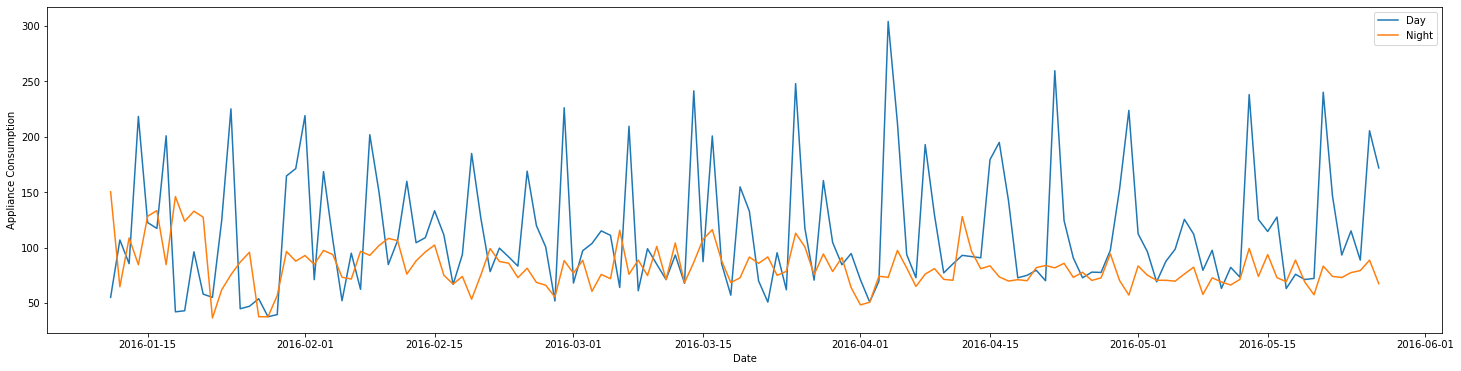

In [ ]:
day_data = d_n_energy_con[d_n_energy_con['Day/Night'] == 'Day']
night_data = d_n_energy_con[d_n_energy_con['Day/Night'] == 'Night']
plt.figure(figsize=(25, 6))
plt.plot(day_data['date1'], day_data['Appliances'], label='Day')
plt.plot(night_data['date1'], night_data['Appliances'], label='Night')
plt.xlabel('Date')
plt.ylabel('Appliance Consumption')
plt.legend()
